In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("../src/")

In [2]:
import matplotsoccer as mps
import pandas as pd
from tqdm import tqdm

In [3]:
data = "../data/spadl.hdf"
games = pd.read_hdf(data,key="games")
epl16 = games[(games.competition_id == 8) & (games.season_id == 2016)]
epl16[:5]

/home/tomd/software/miniconda3/envs/soccer/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,id,game_date,competition_id,season_id,home_team_id,away_team_id,duration
0,855383,2017-01-22 14:15:00,8,2016,3,90,99
0,855500,2017-04-15 14:00:00,8,2016,57,80,95
0,855485,2017-04-08 14:00:00,8,2016,43,88,94
0,855291,2016-11-21 20:00:00,8,2016,35,90,94
0,855213,2016-09-18 13:15:00,8,2016,31,110,94


In [4]:
def get_actions(games, hdf_url):
    actions = []
    for game in tqdm(list(games.itertuples())):
        a = pd.read_hdf(hdf_url, key="actions/" + str(game.id))
        a["left_to_right"] = a["team_id"] == game.home_team_id
        actions.append(a)
    actions = pd.concat(actions)

    actions = always_ltr(actions)

    actiontypes = pd.read_hdf(hdf_url, key="actiontypes")
    actions = actions.merge(actiontypes, on="type_id")

    return actions


def always_ltr(actions):
    away_idx = ~actions.left_to_right
    actions.loc[away_idx, "start_x"] = 105 - actions[away_idx].start_x.values
    actions.loc[away_idx, "start_y"] = 68 - actions[away_idx].start_y.values
    actions.loc[away_idx, "end_x"] = 105 - actions[away_idx].end_x.values
    actions.loc[away_idx, "end_y"] = 68 - actions[away_idx].end_y.values
    return actions

actions = get_actions(epl16,data)
players = pd.read_hdf(data,key="players")
actions = actions.merge(players,left_on="player_id",right_on="id")

100%|██████████| 380/380 [00:04<00:00, 87.15it/s]


In [130]:
pa = actions[actions.last_name.str.contains("Kompany")]
set(pa.soccer_name)

{'Vincent Kompany'}

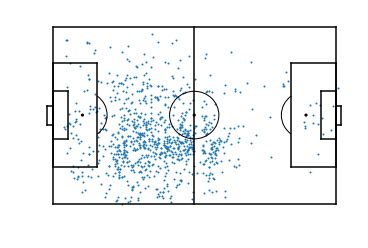

In [135]:
ax = mps.field(show=False)
ax.scatter(pa.start_x,pa.start_y,s=1)

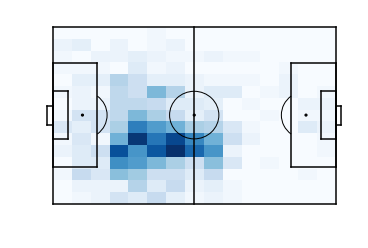

In [133]:
import matplotlib.pyplot as plt
hm = mps.count(pa.start_x,pa.start_y,n=15,m=15)
mps.heatmap(matrix=hm)